# Leading Indicators and Correlated Factors

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import wbgapi as wb
import pandas_datareader.data as web
from src.utils import apply_matplotlib_settings
from src.quant.business_cycles.utils import plot_growth

apply_matplotlib_settings()

## Consumption

Using the "Consumer Sentiment Index" dataset by University of Michigan.

In [19]:
start_date = datetime(1978, 1, 1)
end_date = datetime(2022, 12, 31)
nber = web.DataReader("USREC", "fred", start_date, end_date)
consumer_confidence = web.DataReader("UMCSENT", "fred", start_date, end_date)
inflation = (
    web.DataReader("CPILFESL", "fred", start_date, end_date).pct_change(12)
    * 100
)
print(nber.shape, consumer_confidence.shape, inflation.shape)

(540, 1) (540, 1) (540, 1)


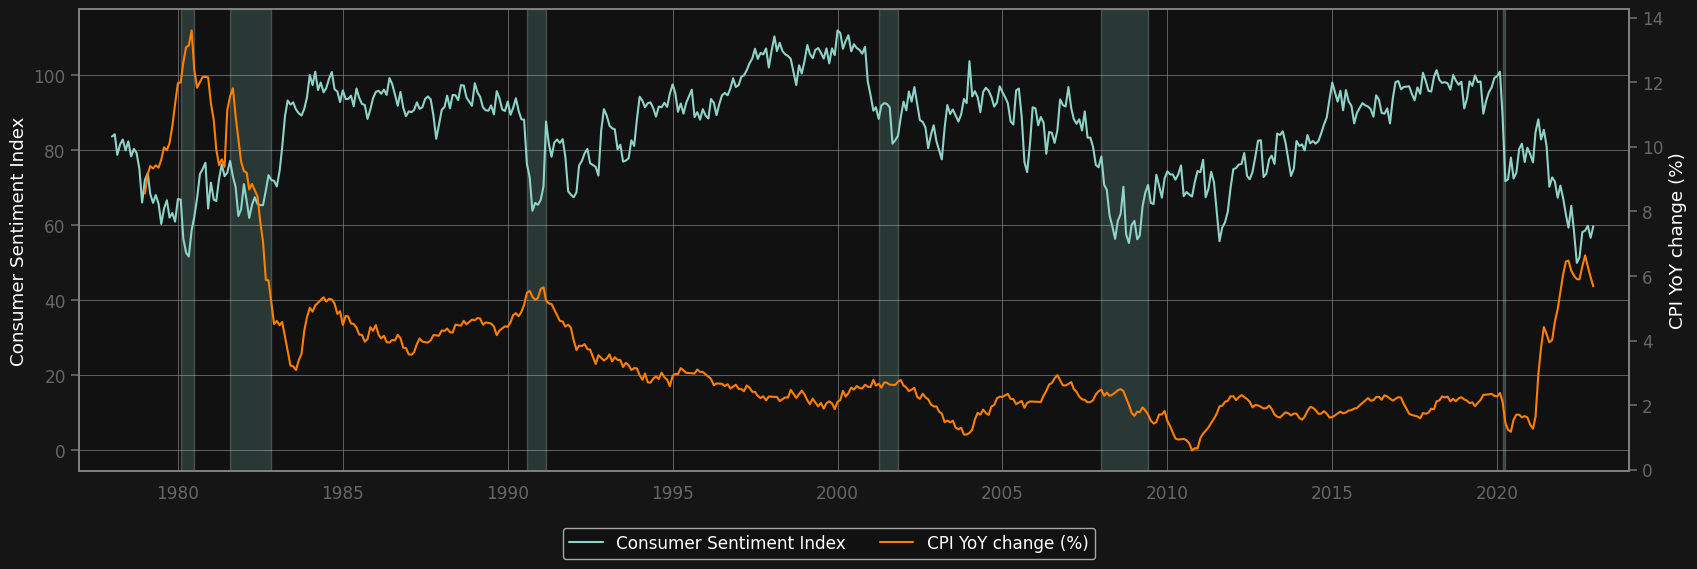

In [40]:
graph_x_limits = [datetime(1977, 1, 1), datetime(2023, 12, 31)]
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(consumer_confidence, label="Consumer Sentiment Index")
ax.fill_between(
    nber.index,
    0,
    1,
    where=nber["USREC"] == 1,
    alpha=0.2,
    transform=ax.get_xaxis_transform(),
)
# ax.set_ylim([0, ax.get_ylim()[1]])
ax.set_ylabel("Consumer Sentiment Index")

ax_t = ax.twinx()
ax_t.plot(inflation, color="#ff7f00", label="CPI YoY change (%)")
ax_t.set_xlim(graph_x_limits)
ax_t.grid(False)
ax_t.set_ylabel("CPI YoY change (%)")

fig.legend(loc="lower center", ncol=5, bbox_to_anchor=(0.5, -0.05))
fig.show()

#### Observations

1. Sentiment drops during the start of recessions and usually recovers after the end of the recession.
1. There is apparent negative correlation between CPI and Sentiment